<h2><a href="https://leetcode.com/problems/maximal-network-rank">1615. Maximal Network Rank</a></h2><h3>Medium</h3><hr><p>There is an infrastructure of <code>n</code> cities with some number of <code>roads</code> connecting these cities. Each <code>roads[i] = [a<sub>i</sub>, b<sub>i</sub>]</code> indicates that there is a bidirectional road between cities <code>a<sub>i</sub></code> and <code>b<sub>i</sub></code>.</p>

<p>The <strong>network rank</strong><em> </em>of <strong>two different cities</strong> is defined as the total number of&nbsp;<strong>directly</strong> connected roads to <strong>either</strong> city. If a road is directly connected to both cities, it is only counted <strong>once</strong>.</p>

<p>The <strong>maximal network rank </strong>of the infrastructure is the <strong>maximum network rank</strong> of all pairs of different cities.</p>

<p>Given the integer <code>n</code> and the array <code>roads</code>, return <em>the <strong>maximal network rank</strong> of the entire infrastructure</em>.</p>

<p>&nbsp;</p>
<p><strong class="example">Example 1:</strong></p>

<p><strong><img alt="" src="https://assets.leetcode.com/uploads/2020/09/21/ex1.png" style="width: 292px; height: 172px;" /></strong></p>

<pre>
<strong>Input:</strong> n = 4, roads = [[0,1],[0,3],[1,2],[1,3]]
<strong>Output:</strong> 4
<strong>Explanation:</strong> The network rank of cities 0 and 1 is 4 as there are 4 roads that are connected to either 0 or 1. The road between 0 and 1 is only counted once.
</pre>

<p><strong class="example">Example 2:</strong></p>

<p><strong><img alt="" src="https://assets.leetcode.com/uploads/2020/09/21/ex2.png" style="width: 292px; height: 172px;" /></strong></p>

<pre>
<strong>Input:</strong> n = 5, roads = [[0,1],[0,3],[1,2],[1,3],[2,3],[2,4]]
<strong>Output:</strong> 5
<strong>Explanation:</strong> There are 5 roads that are connected to cities 1 or 2.
</pre>

<p><strong class="example">Example 3:</strong></p>

<pre>
<strong>Input:</strong> n = 8, roads = [[0,1],[1,2],[2,3],[2,4],[5,6],[5,7]]
<strong>Output:</strong> 5
<strong>Explanation:</strong> The network rank of 2 and 5 is 5. Notice that all the cities do not have to be connected.
</pre>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>2 &lt;= n &lt;= 100</code></li>
	<li><code>0 &lt;= roads.length &lt;= n * (n - 1) / 2</code></li>
	<li><code>roads[i].length == 2</code></li>
	<li><code>0 &lt;= a<sub>i</sub>, b<sub>i</sub>&nbsp;&lt;= n-1</code></li>
	<li><code>a<sub>i</sub>&nbsp;!=&nbsp;b<sub>i</sub></code></li>
	<li>Each&nbsp;pair of cities has <strong>at most one</strong> road connecting them.</li>
</ul>


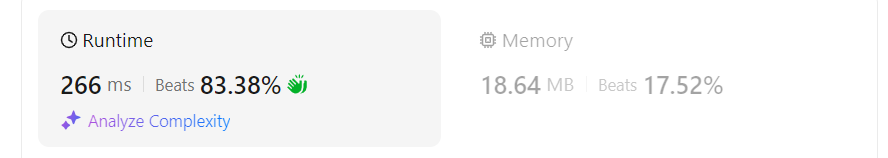

In [ ]:
from collections import defaultdict
class Solution:
    def maximalNetworkRank(self, n: int, roads: List[List[int]]) -> int:
        degree = [0] * n 

        for u, v in roads:  # Get degrees of each node, This is an undirected graph so dont need to bother about indegree and outdegeree
            degree[u] += 1
            degree[v] += 1   

        road_set = set(tuple(road) for road in roads)
        max_rank = 0

        for i in range(n):    
            for j in range(i + 1, n):
                rank = degree[i] + degree[j]
                if (i, j) in road_set or (j, i) in road_set:    # Add degrees of all roads and subtract by 1 if added i, j and j, i combination
                    rank -= 1
                max_rank = max(max_rank, rank)

        return max_rank